## Fashion MNIST- Embedding & Visualization with TensorBoard - Part 2

### What is an Embedding?
- Embedding is a way to map discrete objects (images, words, etc.) to high dimensional vectors.
- The individual dimensions in these vectors typically have no inherent meaning. Instead, it's the overall patterns of location and distance between vectors that machine learning takes advantage of.
- Embeddings are important for input to machine learning. Classifiers, and neural networks more generally, work on vectors of real numbers. They train best on dense vectors, where all values contribute to define an object. 
- Embeddings map objects to vectors, applications can use similarity in vector space (for instance, Euclidean distance or the angle between vectors) as a robust and flexible measure of object similarity. One common use is to find nearest neighbors.

### Workflow  

#### To do a basic embedding visualisation we need to follow the below workflow steps 

- ##### Read the Fashion MNIST data and create an X (image) and Y (label) batch
- ##### Create a Summary Writer
- ##### Configure the projector
- ##### Create the embedding Tensor from X
- ##### Run the TF session and create a model check-point
- ##### Create the sprite image
- ##### Create the metadata (labels) file

### Import Libraries

In [1]:
#Import Numpy for statistical calculations
import numpy as np

# Import Pandas for data manipulation using dataframes
import pandas as pd

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

- ##### Read the Fashion MNIST test data and create an X (image) and Y (label) batch

First we will load the fashion mnist test data into a pandas dataframe and subsequently convert into a numpy array with datatype as float32

In [2]:
test_data = np.array(pd.read_csv(r'data\fashion-mnist_test.csv'), dtype='float32')

Lets consider around 2500 images as part of the embedding

In [3]:
embed_count = 2500

Now we will split our data into x_test for storing images and y_test for storing labels. Since all images are ranging from 0-255 we will need to rescale all of them by dividing with 255 so that it reflects between 0 and 1.

In [4]:
x_test = test_data[:embed_count, 1:] / 255
y_test = test_data[:embed_count, 0]

To store all the events in a log directory for tensorboard view we need to mention the path as below

In [5]:
logdir = r'C:\FashionMNIST\logs'

- ##### Create a Summary Writer

In [6]:
summary_writer = tf.summary.FileWriter(logdir)

In [7]:
# creating the embedding variable with all the images defined above under x_test 
embedding_var = tf.Variable(x_test, name='fmnist_embedding')

- ##### Configure the projector
This is the important part of embedding visualisation. Here we specify what variable we want for the project, what the metadata path is (the names and classes), and where to save the sprites.

In [8]:
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

- ##### Create the embedding Tensor from X

In [9]:
projector.visualize_embeddings(summary_writer,config)

- ##### Run the TF session and create a model check-point

In [10]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, os.path.join(logdir, 'model.ckpt'))
    

- ##### Create the sprite image

In [11]:
rows = 28
cols = 28

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        labels.append(label[int(y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1
        

- ##### Create the metadata (labels) file

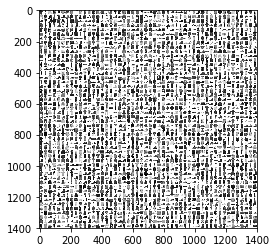

In [12]:
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()

The above figure represents the grayscale fashion products representation in lower dimension.Let us look more closer by zooming the picture as below

![](img/fashion-mnist-sprite.png)


## How to run
We saved our MNIST fashion images, time to visualise it! Follow the steps below

- Step 1 : Go to command prompt and type the following 
C:\Users\Pavan>tensorboard --logdir=C:\FashionMNIST\logs

- Step 2: Now open a browser and navigate to http://127.0.0.1:6006 (note: this can change depending on your computer setup). 
You should see this after navigating to the Projector Tab as shown below


## Visualizing Embeddings
Visualising embeddings is a powerful technique! It helps you understand what your algorithm learned, and if this is what you expected it to learn. 

TensorBoard includes the Embedding Projector, a tool that lets you interactively visualize embeddings. This tool can read embeddings from your model and render them in two or three dimensions.

The Embedding Projector has three panels:
- Data panel on the top left, where you can choose the run, the embedding variable and data columns to color and label points by.
- Projections panel on the bottom left, where you can choose the type of projection.
- Inspector panel on the right side, where you can search for particular points and see a list of nearest neighbors.

### Projections
A projection is a method for taking these high dimensional vections and project them into a lower dimensional space.

The Embedding Projector provides three ways to reduce the dimensionality of a data set.

* #### PCA ( Principal Component Analysis) 

- A linear deterministic algorithm (principal component analysis) that tries to capture as much of the data variability in as few dimensions as possible. PCA tends to highlight large-scale structure in the data, but can distort local neighborhoods. The Embedding Projector computes the top 10 principal components, from which you can choose two or three to view.

![](img/FashionMNIST.gif)

* #### t-SNE (T-distributed stochastic neighbor embedding)  

- A nonlinear nondeterministic algorithm (T-distributed stochastic neighbor embedding) that tries to preserve local neighborhoods in the data, often at the expense of distorting global structure. You can choose whether to compute two- or three-dimensional projections.

- The algorithm is non-linear and adapts to the underlying data, performing different transformations on different regions.

- A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures.Its typically values are between 5 and 50.

- Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

- For the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.

- Epsilon is another parameter used to measure the learning rate 

- The t-SNE algorithm  naturally expands dense clusters, and contracts sparse ones, evening out cluster sizes. To be clear, this is a different effect than the run-of-the-mill fact that any dimensionality reduction technique will distort distances. Rather, density equalization happens by design and is a predictable feature of t-SNE.

- Distances between well-separated clusters in a t-SNE plot may mean nothing.

- Low perplexity levels often show cloud of points generated randomly which has no statistically interesting clusters (clumps).Recognizing these clumps as random noise is an important part of reading t-SNE plots.

-  Topological information off a t-SNE plot can be read with views at multiple perplexities. 

Source: https://distill.pub/2016/misread-tsne/

![](img/t-SNE.gif)

* #### Custom: 

- A linear projection onto horizontal and vertical axes that you specify using labels in the data. You define the horizontal axis, for instance, by giving text patterns for "Left" and "Right". The Embedding Projector finds all points whose label matches the "Left" pattern and computes the centroid of that set; similarly for "Right". The line passing through these two centroids defines the horizontal axis. The vertical axis is likewise computed from the centroids for points matching the "Up" and "Down" text patterns.

![](img/FashionMNIST.png)

#### Exploration

You can explore visually by zooming, rotating, and panning using natural click-and-drag gestures. Hovering your mouse over a point will show any metadata for that point. You can also inspect nearest-neighbor subsets. Clicking on a point causes the right pane to list the nearest neighbors, along with distances to the current point. The nearest-neighbor points are also highlighted in the projection.
It is sometimes useful to restrict the view to a subset of points and perform projections only on those points. To do so, you can select points in multiple ways:
- After clicking on a point, its nearest neighbors are also selected.
- After a search, the points matching the query are selected.
- Enabling selection, clicking on a point and dragging defines a selection sphere.